# Exploratory data analysis on AirBnB Listings (EDA)

### Context
According to it's website, Airbnb defines itself as:

*"You can host anything, anywhere, so guests can enjoy everything, everywhere.*

**"A community built for belonging"**

*"Airbnb began in 2008 when two designers who had space to share hosted three travelers looking for a place to stay. Now, millions of Hosts and guests have created free Airbnb accounts to enjoy each other's unique view of the world."*

### Goals

The main goal of this EDA it is to present in simple terms the **main characteristics of the AirBnB's rentals** or listings in the City of Valencia, Spain.

## Load Data

### Data Selection

First, we import all the necessary data from the csv file selected. In this case, the data selected is from Valencia, Spain. Below there is a map of Valencia with the delimeters of the neighbourhoods (A.K.A Barrios). This map is useful for future references as it place us "in situ". Also it's necessary to load all the packages & modules that are essential to the proper analysis of the data.
The data collected is updated to September 2023 and it's available at the Inside AirBnb website [here: Inside AirBnb](http://insideairbnb.com/get-the-data/)

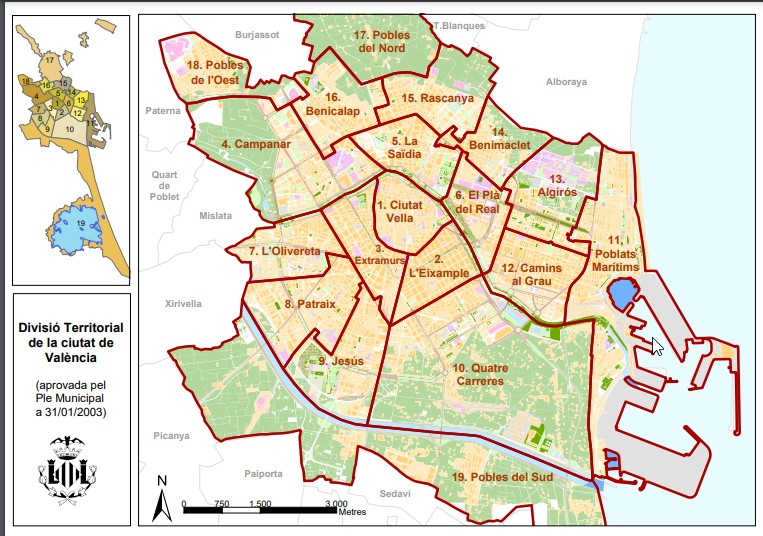

In [49]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### Data Analysis

In a first glance of the data we can see the different content of the dataframe:

In [52]:
data_valencia = pd.read_csv("C:/Users/migde/OneDrive/Escritorio/DSPT12/EDA REVIEW MODULE/listings Valencia.csv", delimiter=',')
data_valencia.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,48154,Rental unit in Valencia · ★4.56 · 2 bedrooms ·...,219476,Toni,LA SAIDIA,MORVEDRE,39.48375,-0.37502,Entire home/apt,89,4,137,2023-08-31,0.87,4,52,9,VT-41540-V
1,55692,Rental unit in Valencia · 1 bedroom · 1 bed,120649,Pilar,CIUTAT VELLA,LA SEU,39.47658,-0.37654,Entire home/apt,100,1,1,2014-11-11,0.01,1,0,0,NaN
2,100347,Rental unit in València · ★4.58 · 3 bedrooms ·...,1451371,Santiago,EXTRAMURS,ARRANCAPINS,39.45965,-0.38453,Entire home/apt,171,3,142,2023-09-01,2.02,1,0,7,NaN
3,102524,Villa in Valencia · ★4.56 · 5 bedrooms · 20 be...,535881,Vicente,POBLATS MARITIMS,LA MALVA-ROSA,39.48197,-0.32456,Entire home/apt,532,2,197,2023-08-13,1.36,7,87,30,VT-36438-V
4,136378,Condo in Valencia · ★4.46 · 1 bedroom · 2 beds...,591197,Elisa,CIUTAT VELLA,EL MERCAT,39.47358,-0.37815,Entire home/apt,75,28,25,2023-06-30,0.17,3,6,2,VT-42161-V


It's mandatory to look the rows and columns of the dataframe, as well as the types (or the information) of each column.

In [53]:
data_valencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8627 entries, 0 to 8626
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              8627 non-null   int64  
 1   name                            8627 non-null   object 
 2   host_id                         8627 non-null   int64  
 3   host_name                       8627 non-null   object 
 4   neighbourhood_group             8627 non-null   object 
 5   neighbourhood                   8627 non-null   object 
 6   latitude                        8627 non-null   float64
 7   longitude                       8627 non-null   float64
 8   room_type                       8627 non-null   object 
 9   price                           8627 non-null   int64  
 10  minimum_nights                  8627 non-null   int64  
 11  number_of_reviews               8627 non-null   int64  
 12  last_review                     75

The dataframe is composed of 18 columns & 8627 rows.
We can see a diverse set of features & insights in the code run above, such as: Name of the host, Neighbourhood, Prices, Reviews, Availability and also Licenses.
With this detailed data, we can provide interesting insights about the rentals.

Some of the questions that may arise are:

*1 - Where are located the rentals in Valencia?*

*2 - What are the price ranges?*

*3 - Where are the higher priced rentals?*

*4 - Which are the most common price ranges depending of the room types?*

*5 - Which are the hosts with more properties rented?*

*6 - What are the different types of rooms available in Valencia?*

*7 - Prices by dates/seasons*


#### 1 - Where are located the rentals in Valencia?
With the latitude and longitude, a map is shown as a future template or reference:

In [54]:
lat_long = data_valencia[['latitude','longitude']].dropna()
lat_long

,latitude,longitude
0,39.483750,-0.375020
1,39.476580,-0.376540
2,39.459650,-0.384530
3,39.481970,-0.324560
4,39.473580,-0.378150
...,...,...
8622,39.488790,-0.358250
8623,39.466590,-0.376320
8624,39.488040,-0.357950
8625,39.470253,-0.378285


In [55]:
map1 = folium.Map (location = [39.473829,-0.394873], zoom_start = 15, tiles = "OpenStreetMap")
map1

To see the listings distibution, a HeatMap is practical in order to see it:

In [56]:
from folium.plugins import HeatMap
folium_hmap1 = folium.Map(location=[39.473829,-0.394873], zoom_start=9, tiles="OpenStreetMap")
folium_hmap1.add_child(
    HeatMap(data_valencia[['latitude','longitude',]].dropna(),
        zoom_start=10,
        min_opacity=0.2,
        radius = 10,
        blur = 4
    )
)

It is relevant to point out that the distribution of the rentals it is not strictly bonded to the city, but it's actually spread it out throughout the surrounding neighborhoods; for example, we can see a good number of rentals located in the "Parc Natural de l'Albufera" which is a Spanish protected natural area.

#### 2 - What are the price ranges?
To find out the price ranges of the neighbourhoods, one of the best tools is a distribution chart:

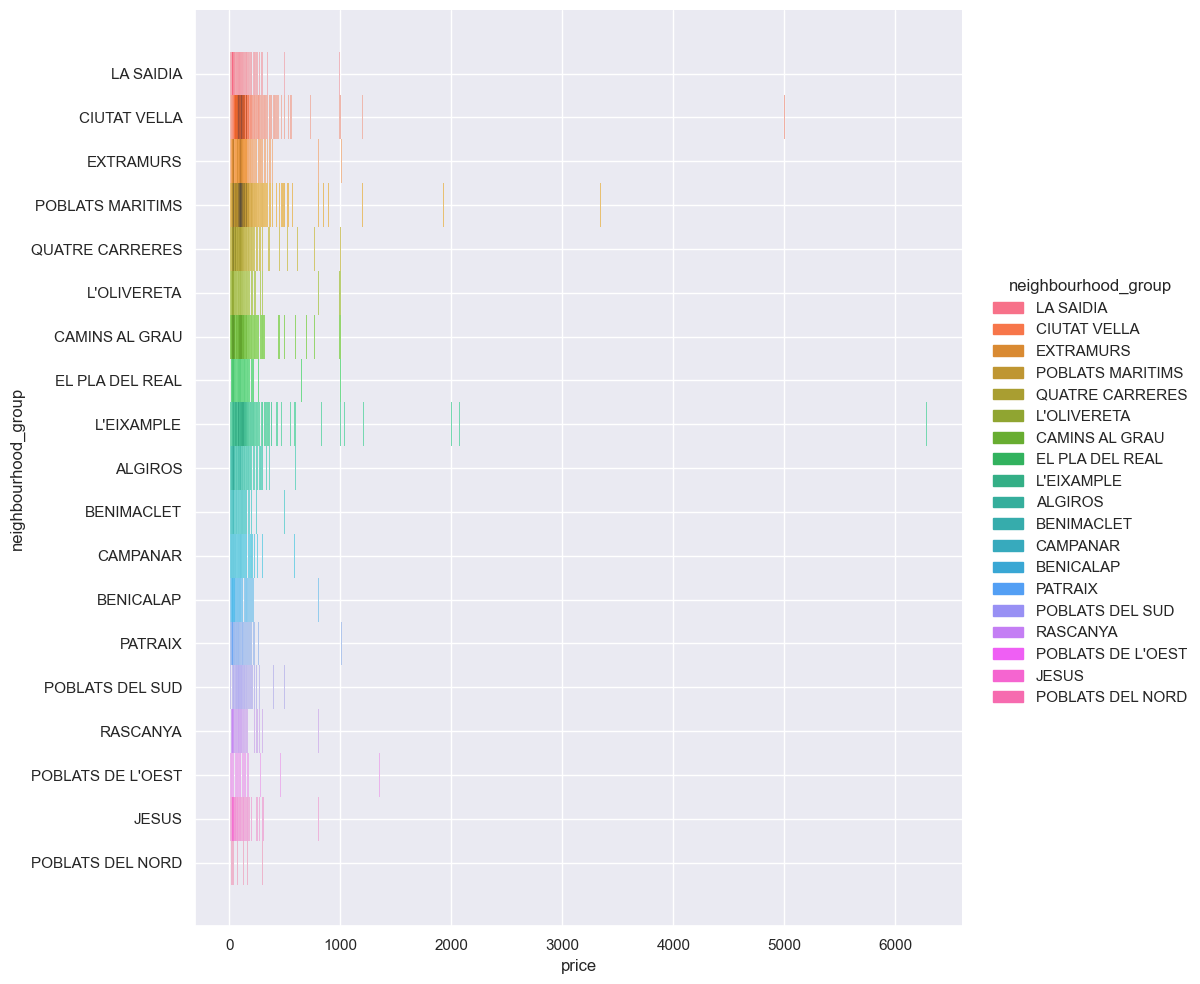

In [57]:
sns.set_theme(style="darkgrid")
sns.displot(data=data_valencia, y="neighbourhood_group", x="price", hue="neighbourhood_group", height=10
)

Through a first glance of the distribution, we van see values that can be labeled as **outliers**, or outside of the "normal" pricing range of the rentals. This could be attributed to an error in the data, or are the real values of those listings. For the sake of this simple analysis, we will use the IQR (Interquartile Range) of the values in the listings.
The formula and explanation of the IQR is shown below:

![Alt text](image.png)

In [58]:
# Finding the IQR
q3 = data_valencia["price"].quantile(0.75)
q1 = data_valencia["price"].quantile(0.25)
iqr = q3 - q1

# Get the values that are greater than 1.5 * iqr
upper_bound = q3 + (1.5 * iqr) # The result is 252.0
lower_bound = q1 - (1.5 * iqr) # The result is -68.0, so in this case, we will not use the lower bound

# Adding a new column in the dataframe called "price_ub" (price upper bound)
data_valencia['price_ub'] = np.clip(data_valencia['price'], 0, upper_bound)

In [59]:
data_valencia['price_ub']

0        89
1       100
2       171
3       252
4        75
       ... 
8622     24
8623    172
8624     26
8625     85
8626    115
Name: price_ub, Length: 8627, dtype: int64

With the "price_ub" column created, the distribution chart is more cohesive and shows easily the information needed.

Text(0.5, 12.44444444444443, 'Price')

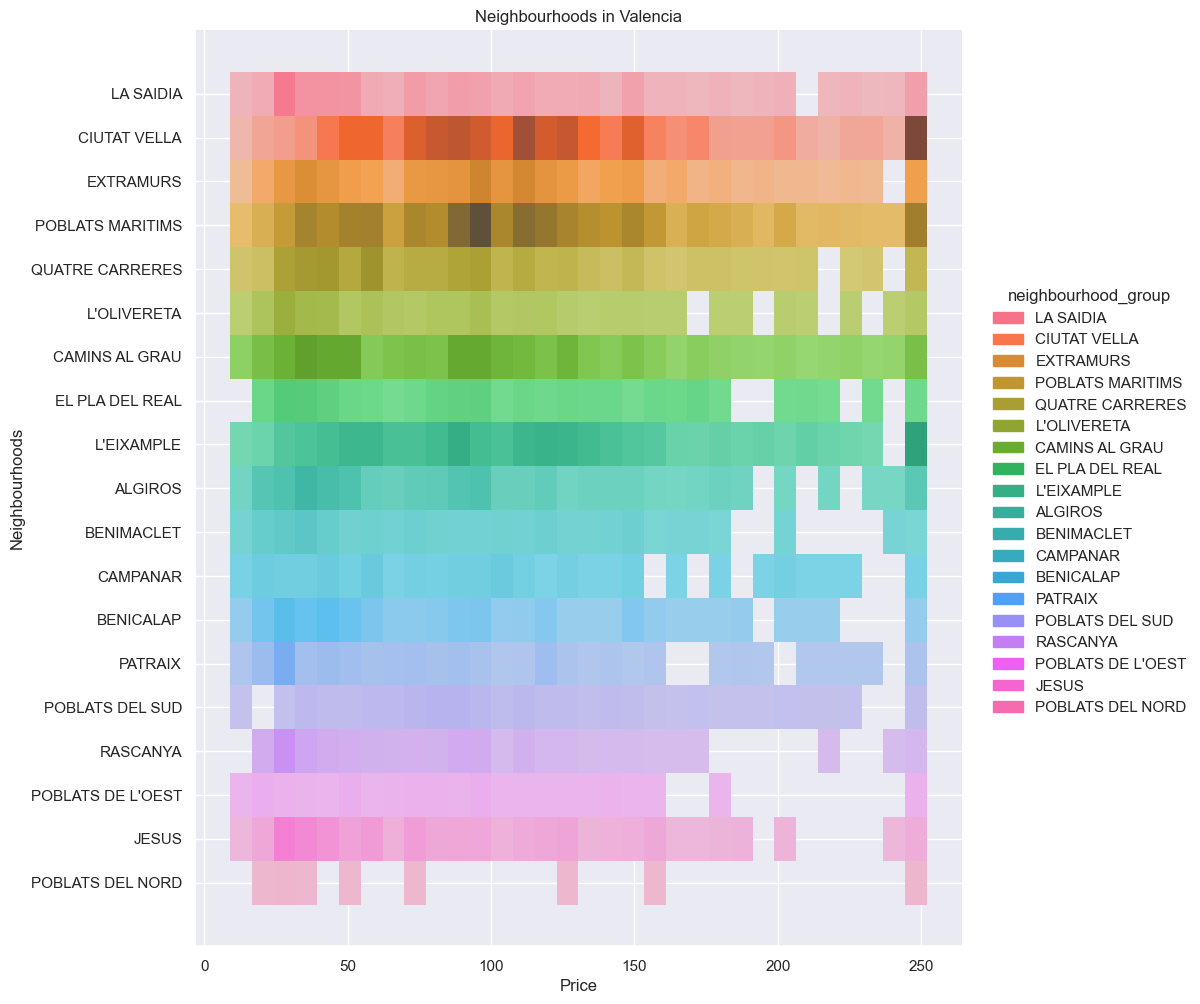

In [60]:
sns.set_theme(style="darkgrid")
sns.displot(data=data_valencia, y="neighbourhood_group", x="price_ub", hue="neighbourhood_group", height=10)
plt.title("Neighbourhoods in Valencia")
plt.ylabel("Neighbourhoods")
plt.xlabel("Price")

#### 3 - Where are the higher priced rentals?
The graph shows that the neighbourhoods with the highest pricing points for rentals are: *L'EIXAMPLE & CIUTAT VELLA*.

This input is interesting to keep in mind, because the common agreement is that the seaviews or the distance to the sea are the distinguishing features that increase the pricing points of the rentals. In this case, the data shows that the "downtown" neighbourhoods are the ones with the highest pricing points.

The neighbourhood with the sea view, *POBLATS MARITIMS*, has its pricing point valued below 100€, while the aforementioned, have it for over 250€.

#### 4 - Which are the most common price ranges depending of the room types?

With the code below, a graph is shown with those inquiries:

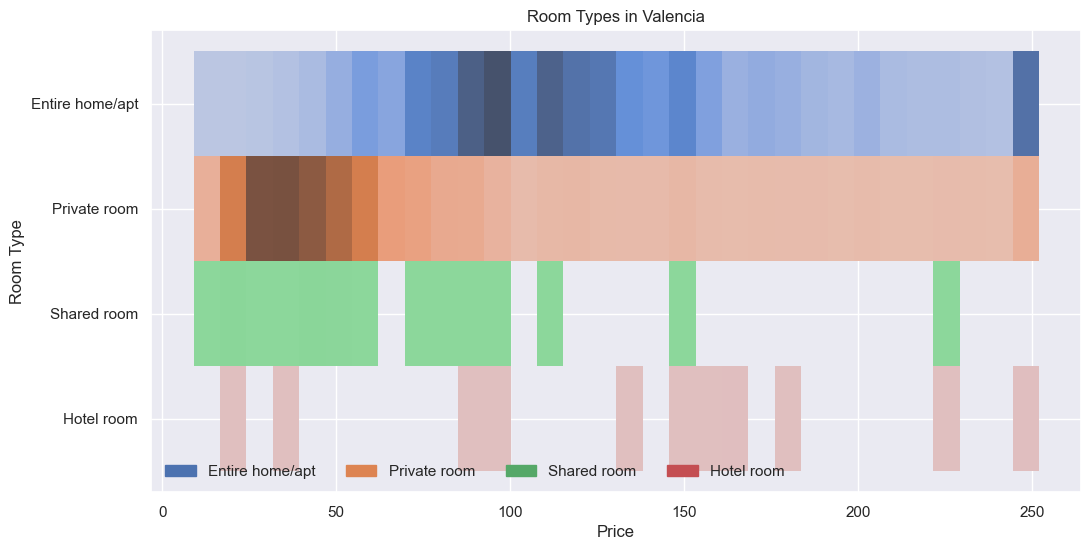

In [61]:
plt.figure(figsize=(12, 6))
graph_2 = sns.histplot(data=data_valencia, y="room_type", x="price_ub", hue="room_type")
plt.title("Room Types in Valencia")
plt.xlabel("Price")
plt.ylabel("Room Type")
sns.move_legend(graph_2,"lower left", ncol=4, title=None, frameon=False)

In the graph, it is clear that the range of prices is quite diverse. Nevertheless, there are some clusters or "agreements" on the prices, for example, for an entire home or apartment, the most common prices are between 70€ up to 120€. 

There are some outliers as previously shown in the prices of entire homes/apartments that exceed the 250


#### 5 - Which are the hosts with more properties rented?

The code to see all the different host's ID's is written below. There are 4531 different hosts, as shown:

In [62]:
data_valencia.value_counts('host_id')

host_id
83066665     166
123160301     43
97229818      39
134221412     39
134051803     38
            ... 
101213452      1
101338869      1
101355916      1
101595632      1
159096968      1
Name: count, Length: 4531, dtype: int64

To see the top hosts in a more visual way, a graph is placed showing the top 30.

C:\Users\migde\AppData\Local\Temp\ipykernel_19324\1444970524.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  hosts_graph = sns.barplot(host_id_count.values, palette='Purples_r')


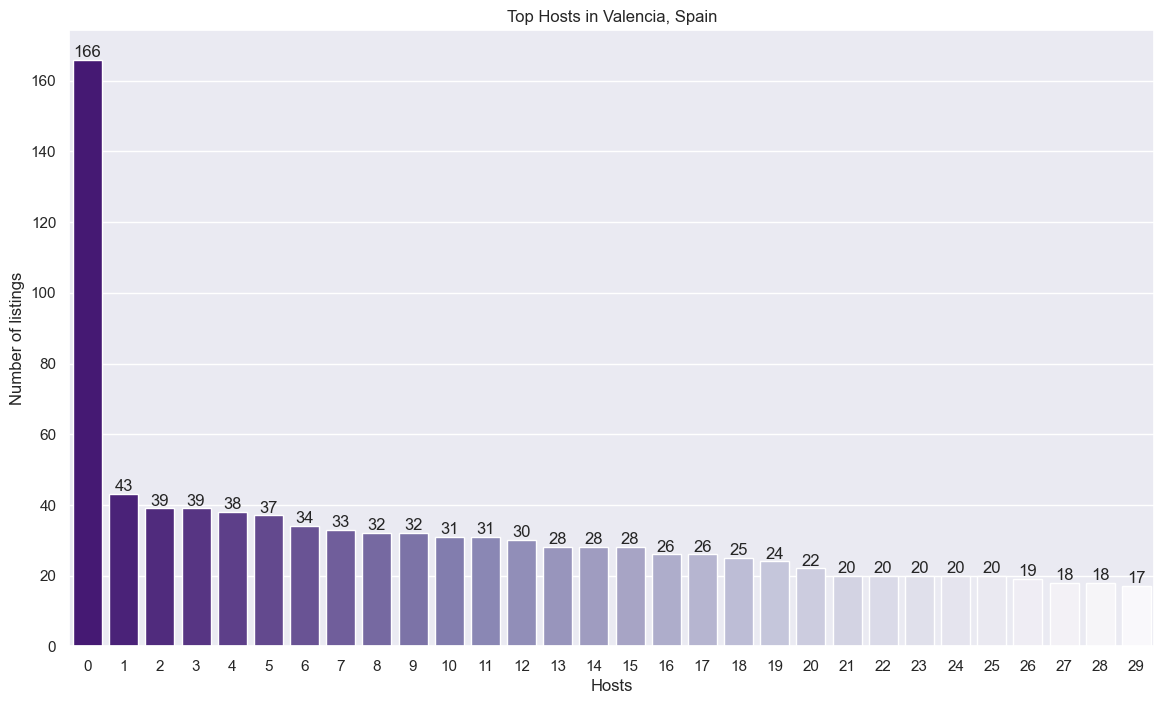

In [63]:
host_id_count  = data_valencia['host_id'].value_counts()
host_id_count = host_id_count[:30,]
plt.figure(figsize=(14,8))
hosts_graph = sns.barplot(host_id_count.values, palette='Purples_r')
for i in hosts_graph.containers:
    hosts_graph.bar_label(i,)
plt.title('Top Hosts in Valencia, Spain')
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Hosts', fontsize=12)
plt.show()

According to the Inside AirBnb site, this type of host behavior is common: "Some Airbnb hosts have multiple listings. 
A host may list separate rooms in the same apartment, or multiple apartments or homes available in their entirit 

Hosts with multiple listings are more likely to be running a business, are unlikely to be living in the property, and in violation of most short term rental laws designed to protect residential housing."

#### 6 - What are the different types of rooms available in Valencia?

Its useful to have the numbers of the different types of rooms available in Valencia.

In [64]:
data_valencia.value_counts('room_type')

room_type
Entire home/apt    5736
Private room       2838
Shared room          35
Hotel room           18
Name: count, dtype: int64

C:\Users\migde\AppData\Local\Temp\ipykernel_19324\3231422183.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  room_type_graph = sns.barplot(room_type_count.values, palette='Spectral', legend='full')


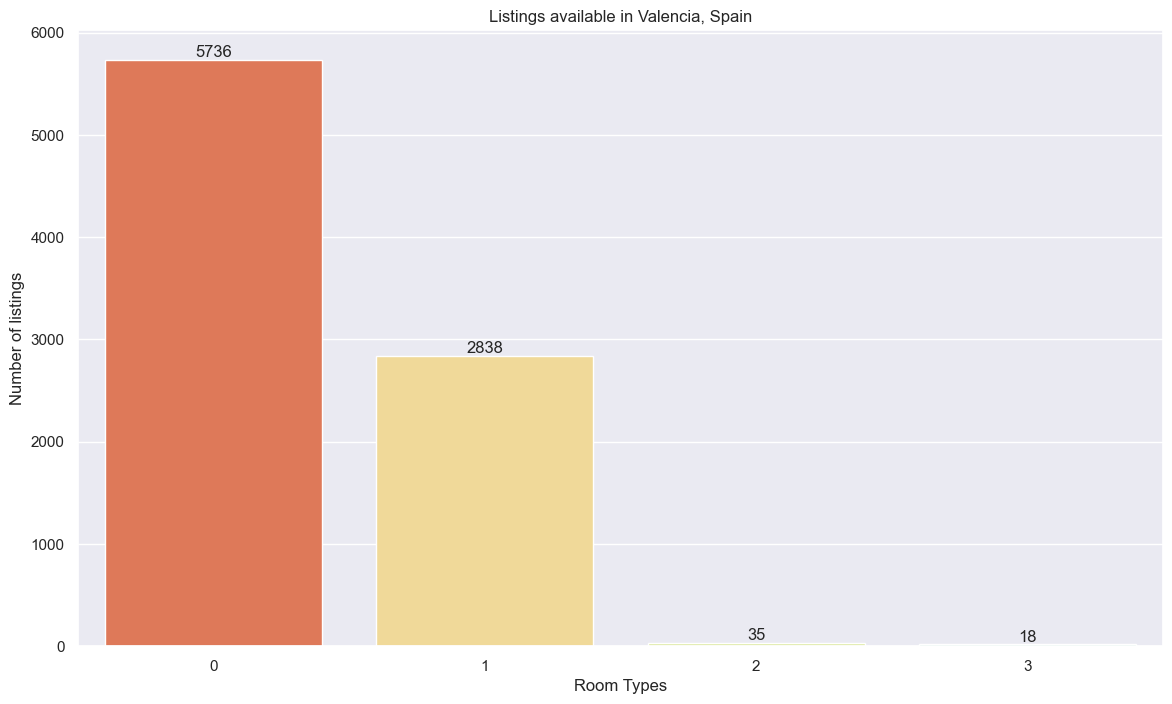

In [65]:
room_type_count  = data_valencia['room_type'].value_counts()
plt.figure(figsize=(14,8))
room_type_graph = sns.barplot(room_type_count.values, palette='Spectral', legend='full')
for i in room_type_graph.containers:
    room_type_graph.bar_label(i,)
plt.title('Listings available in Valencia, Spain')
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Room Types', fontsize=12)
plt.show()

### 7 - Prices by dates/seasons

With the of merge two dataframes, listings and calendar, it's possible to analyze the pricing points by dates or seasons. The dataframe calendar is not yet loaded in this EDA, so it must be done as well. 

In [66]:
#There it has to be a common column in both dataframes in order to make the merge, in this case the 
#column is "listing_id" in calendar or "id" in data_valencia
data_valencia['listing_id'] = data_valencia['id']
data_valencia

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price_ub,listing_id
0,48154,Rental unit in Valencia · ★4.56 · 2 bedrooms ·...,219476,Toni,LA SAIDIA,MORVEDRE,39.483750,-0.375020,Entire home/apt,89,4,137,2023-08-31,0.87,4,52,9,VT-41540-V,89,48154
1,55692,Rental unit in Valencia · 1 bedroom · 1 bed,120649,Pilar,CIUTAT VELLA,LA SEU,39.476580,-0.376540,Entire home/apt,100,1,1,2014-11-11,0.01,1,0,0,NaN,100,55692
2,100347,Rental unit in València · ★4.58 · 3 bedrooms ·...,1451371,Santiago,EXTRAMURS,ARRANCAPINS,39.459650,-0.384530,Entire home/apt,171,3,142,2023-09-01,2.02,1,0,7,NaN,171,100347
3,102524,Villa in Valencia · ★4.56 · 5 bedrooms · 20 be...,535881,Vicente,POBLATS MARITIMS,LA MALVA-ROSA,39.481970,-0.324560,Entire home/apt,532,2,197,2023-08-13,1.36,7,87,30,VT-36438-V,252,102524
4,136378,Condo in Valencia · ★4.46 · 1 bedroom · 2 beds...,591197,Elisa,CIUTAT VELLA,EL MERCAT,39.473580,-0.378150,Entire home/apt,75,28,25,2023-06-30,0.17,3,6,2,VT-42161-V,75,136378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8622,980266361558300871,Rental unit in València · ★New · 1 bedroom · 1...,418835758,Anabel,BENIMACLET,BENIMACLET,39.488790,-0.358250,Private room,24,1,0,NaN,NaN,2,262,0,NaN,24,980266361558300871
8623,980268518716055234,Rental unit in València · ★New · 1 bedroom · 1...,521792135,Catalina,L'EIXAMPLE,RUSSAFA,39.466590,-0.376320,Private room,172,2,0,NaN,NaN,5,27,0,NaN,172,980268518716055234
8624,980350081270434728,Rental unit in València · ★New · 1 bedroom · 1...,418835758,Anabel,BENIMACLET,BENIMACLET,39.488040,-0.357950,Private room,26,1,0,NaN,NaN,2,268,0,NaN,26,980350081270434728
8625,980372458526562231,Rental unit in València · ★New · 2 bedrooms · ...,125037312,Claudia,CIUTAT VELLA,SANT FRANCESC,39.470253,-0.378285,Entire home/apt,85,30,0,NaN,NaN,20,268,0,NaN,85,980372458526562231


In [67]:
data_calendar = pd.read_csv("C:/Users/migde/OneDrive/Escritorio/DSPT12/EDA REVIEW MODULE/calendar.csv", delimiter=',')

In [68]:
# Remove the $ from the price variables & convert the dates into datetime.type
data_calendar['price'] = data_calendar['price'].replace('[$,]', '', regex=True).astype(float)
data_calendar['adjusted_price'] = data_calendar['adjusted_price'].replace('[$,]', '', regex=True).astype(float)
data_calendar["date"] = pd.to_datetime(data_calendar["date"], format = "%Y-%m-%d")
data_calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,48154,2023-09-16,t,100.0,100.0,4,25
1,48154,2023-09-17,t,85.0,85.0,4,25
2,48154,2023-09-18,f,85.0,85.0,4,25
3,48154,2023-09-19,f,85.0,85.0,4,25
4,48154,2023-09-20,f,85.0,85.0,4,25
...,...,...,...,...,...,...,...
3148850,980560179794671554,2024-09-10,f,115.0,115.0,3,1125
3148851,980560179794671554,2024-09-11,f,115.0,115.0,3,1125
3148852,980560179794671554,2024-09-12,f,115.0,115.0,3,1125
3148853,980560179794671554,2024-09-13,f,115.0,115.0,3,1125


With all the adjustments made, the merge & graphics are ready to be done:

In [69]:
data_merged = data_valencia.merge(data_calendar, how='inner', on='listing_id')
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148855 entries, 0 to 3148854
Data columns (total 26 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   id                              int64         
 1   name                            object        
 2   host_id                         int64         
 3   host_name                       object        
 4   neighbourhood_group             object        
 5   neighbourhood                   object        
 6   latitude                        float64       
 7   longitude                       float64       
 8   room_type                       object        
 9   price_x                         int64         
 10  minimum_nights_x                int64         
 11  number_of_reviews               int64         
 12  last_review                     object        
 13  reviews_per_month               float64       
 14  calculated_host_listings_count  int64         
 15

Text(0, 0.5, 'Price')

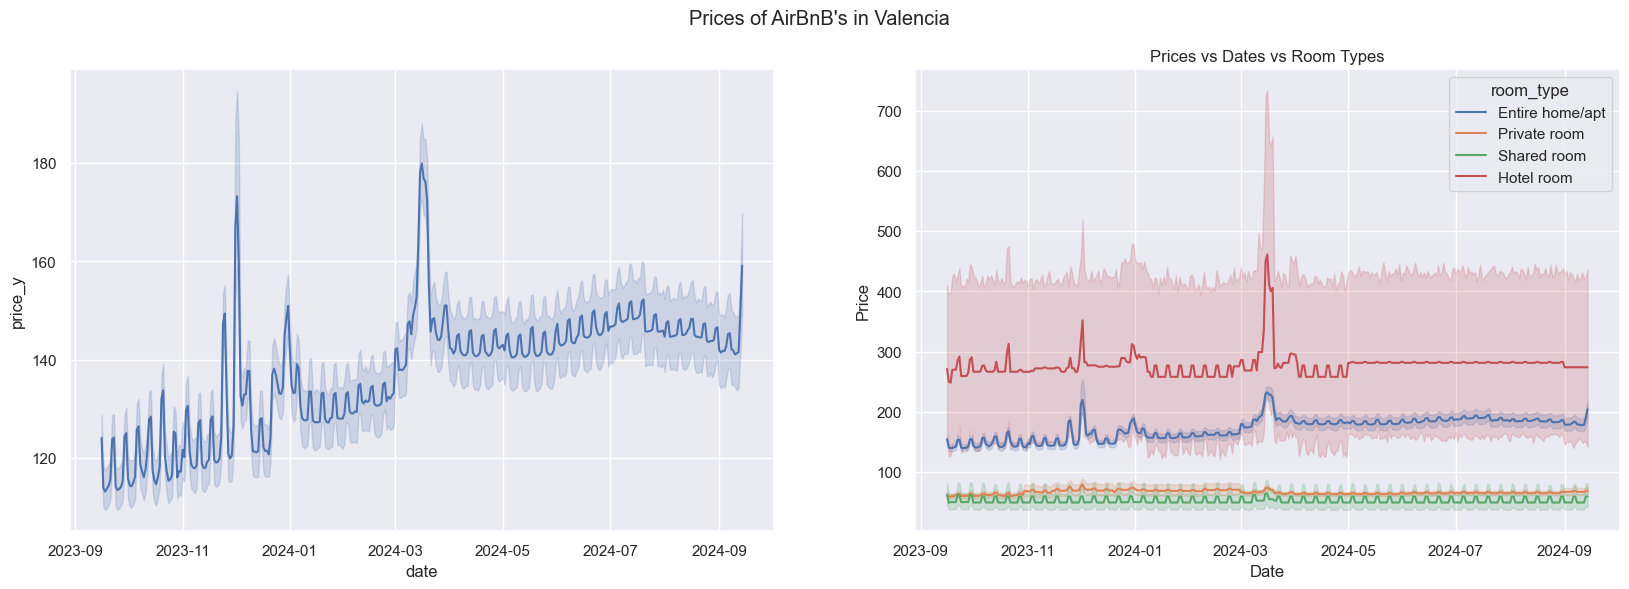

In [70]:
# This will be displayed in a grid format.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Let's add a general title.
fig.suptitle("Prices of AirBnB's in Valencia")

# Add graphs at particular locations.

sns.lineplot(data=data_merged, x="date",y="price_y", ax = axes[0])
plt.title("Prices vs Dates")
plt.xlabel("Date")
plt.ylabel("Price")

sns.lineplot(data=data_merged, x="date",y="price_y", hue ="room_type", ax = axes[1])
plt.title("Prices vs Dates vs Room Types")
plt.xlabel("Date")
plt.ylabel("Price")

It's noticeable that the prices reach peaks in December-January (Holiday Season) & also on March (local holiday in Comunitat Valenciana). Also during the spring-summer season there is a slight increase in the prices as well. Just to clarify this observation, it's necessary to see the prices in the different months:

In [71]:
data_merged["month"] = data_calendar["date"].dt.month
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148855 entries, 0 to 3148854
Data columns (total 27 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   id                              int64         
 1   name                            object        
 2   host_id                         int64         
 3   host_name                       object        
 4   neighbourhood_group             object        
 5   neighbourhood                   object        
 6   latitude                        float64       
 7   longitude                       float64       
 8   room_type                       object        
 9   price_x                         int64         
 10  minimum_nights_x                int64         
 11  number_of_reviews               int64         
 12  last_review                     object        
 13  reviews_per_month               float64       
 14  calculated_host_listings_count  int64         
 15

In [72]:
data_merged.groupby(data_merged.date.dt.month)['price_x'].sum()

date
1     30859973
2     28869007
3     30859973
4     29864490
5     30859973
6     29864490
7     30859973
8     30859973
9     28869007
10    30859973
11    29864490
12    30859973
Name: price_x, dtype: int64

C:\Users\migde\AppData\Local\Temp\ipykernel_19324\3774249073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  price_per_months_graph = sns.barplot(price_per_months.values, palette='Spectral')


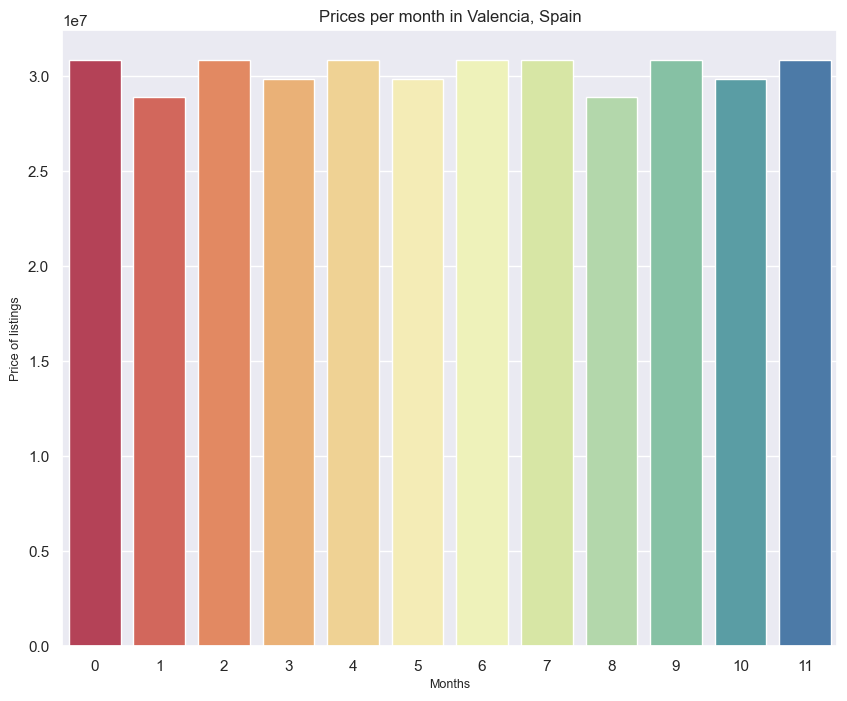

In [73]:
price_per_months  = data_merged.groupby(data_merged.date.dt.month)['price_x'].sum()
plt.figure(figsize=(10,8))
price_per_months_graph = sns.barplot(price_per_months.values, palette='Spectral')
plt.title('Prices per month in Valencia, Spain')
plt.ylabel('Price of listings', fontsize=9)
plt.xlabel('Months', fontsize=9)
plt.show()